## 1. Business Understanding

### Business Overview

The system is designed to flag potential shell companies by analyzing various data sources, including financial transactions, beneficial ownership, company registration, and payroll records. It leverages machine learning, natural language processing, and network analysis to detect fraud patterns and suspicious behavior. The system provides insights into recurring vendor and employee issues, fraud behaviors, and high-risk transactions. These insights help investigation teams take actions like launching audits, conducting legal proceedings, and improving internal controls to mitigate financial and compliance risks.

### 1.1 Problem Statement

Shell companies are often used for illicit activities such as money laundering, tax evasion, and fraud. Detecting these entities requires analyzing complex financial patterns and ownership structures, making it challenging for organizations to identify and mitigate fraud risks efficiently.

### 1.2 Proposed Solutions

- Officials collaborating with contractors to manipulate the bidding process
- Artificially inflated prices for goods and services
- Contracts awarded at prices significantly above market rates
Shell Companies and Fraudulent Vendors
Use of fake or shell companies to win contracts
Lack of proper vetting for new or suspicious vendors


### 1.3 Objectives

- Detect and flag potential shell companies based on financial transactions and ownership structures.
- Analyze complex patterns such as circular transactions, ownership layering, and high-risk jurisdictions.
- Provide real-time alerts on suspicious activities like sudden fund transfers and unusual vendor relationships.
- Deliver actionable insights to investigation teams, including recurring fraud behaviors and high-risk entities.
- Support decision-making for audits, legal proceedings, and risk mitigation strategies.
Enhance compliance with anti-money laundering (AML) regulations by identifying non-compliant companies.

### 1.4 Metrics of Success

Accuracy = 80%
Recall = 80%

### 1.5 StakeHolders

1. Government Agencies: Entities responsible for regulating financial activities, tax compliance, and public procurement (e.g., anti-fraud units, tax authorities, anti-money laundering bodies).

2. Financial Institutions: Banks, payment processors, and other financial service providers that monitor transactions for fraud and ensure compliance with AML regulations.

3. Corporate Compliance Teams: Internal teams within corporations tasked with ensuring regulatory compliance, identifying fraud risks, and mitigating legal exposure.

4. Auditors and Legal Investigators: Professionals who will use insights from the system to launch audits, investigate fraudulent activities, and initiate legal actions against shell companies.

5. Law Enforcement: Police and specialized financial crime units that handle cases of fraud, money laundering, and other criminal activities related to shell companies.

6. Regulatory Bodies: Organizations overseeing corporate governance, financial compliance, and anti-corruption efforts that would benefit from insights and recommendations provided by the system.

7. Internal Risk Management Teams: Departments within businesses that focus on identifying and managing financial and compliance risks, using the system to prevent and detect fraudulent activities.

8. Technology and Data Science Teams: Teams responsible for implementing and maintaining the fraud detection system, including data scientists, machine learning engineers, and IT personnel.

9. Policy Makers: Government officials who might use the insights from the system to propose reforms or stricter regulations around shell companies and financial fraud.

10. External Audit Firms: Independent audit firms hired by organizations to conduct financial audits and compliance checks based on the data and patterns identified by the system.

### 1.6 Constraints

- Access to real-world, high-quality financial, transactional, and ownership data is limited due to privacy regulations, lack of transparency, or restricted access to government databases.
- Incomplete, outdated, or inaccurate data may impact the effectiveness of machine learning models and the overall fraud detection system.
- Balancing model precision is challenging, as too many false positives may overwhelm investigating teams, while too few could miss critical fraud cases.
- Developing, testing, and refining a fully functional system within a limited timeline may restrict the scope of the project or delay advanced features like NLP or network analysis.
-  Ensuring the security of sensitive financial data and preventing breaches or unauthorized access could add complexity to the system’s design and implementation.

## 2.  Data Understanding

### 2.1 Data Collection

**Data sources**:

Identify and collect relevant
data from various sources, like historical fraud
records, customer information and transaction
data. Our major sources were Kaggle and
github repositories.

#### Column Decsription of The data

- step: The time step of the transaction.
- type: The type of transaction (e.g., PAYMENT, TRANSFER, CASH_OUT).
- amount: The transaction amount.
- nameOrig: The originator's account ID.
- oldbalanceOrg: The old balance of the originator before the transaction.
- newbalanceOrig: The new balance of the originator after the transaction.
- nameDest: The destination account ID.
- oldbalanceDest: The old balance of the destination before the transaction.
- newbalanceDest: The new balance of the destination after the transaction.
- isFraud: A binary indicator (0 or 1) showing whether the transaction is fraudulent.
- isFlaggedFraud: A binary indicator for flagged fraudulent transactions.

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import os
import PyPDF2

# Function to extract text from a single PDF file
def extract_text_from_pdf(pdf_file):
    with open(pdf_file, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(reader.pages)):  # Loop through all pages
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

# Function to create folder if it doesn't exist
def create_folder_if_not_exists(folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

# Function to process multiple PDF files, merge the text, and save into a single text file
def process_and_merge_pdfs(pdf_folder, output_file):
    merged_text = ''  # Initialize an empty string to hold all extracted text

    for pdf_file in os.listdir(pdf_folder):
        if pdf_file.endswith('.pdf'):
            pdf_path = os.path.join(pdf_folder, pdf_file)
            text = extract_text_from_pdf(pdf_path)
            merged_text += f"--- Extracted from: {pdf_file} ---\n{text}\n\n"
            print(f"Processed {pdf_file}")

    # Save the merged text into a single .txt file
    with open(output_file, 'w') as f:
        f.write(merged_text)
    print(f"Merged text saved to {output_file}")

# Folder containing the PDF files
pdf_folder = 'pdf_files'  # Replace with your folder path

# Path where the merged text file will be saved
output_file = 'merged_fraud_data.txt'  # Define the merged output text file name

# Run the process to merge text from all PDFs into one file
process_and_merge_pdfs(pdf_folder, output_file)


Processed PPRA 2020 -2021 ANNUAL REPORT.pdf
Processed AUDITOR-GENERALS-SUMMARY-REPORT-ON-NATIONAL-GOVERNMENT-2022-2023-with-cover.pdf
Merged text saved to merged_fraud_data.txt


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english') + ['ø³','ø', 'ù'])
lemmatizer = WordNetLemmatizer()

def remove_corrupted_text(text):
    # Implement this function based on your specific needs
    # For now, we'll just return the text as is
    return text

def process_text(text):
    # Remove corrupted text
    text = remove_corrupted_text(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keep the text after the #)
    text = re.sub(r'#', '', text)
    # Remove special characters like "&quot;"
    text = re.sub(r'&\w+;', '', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra white spaces
    tokens = [word.strip() for word in tokens if word.strip() != '']
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Tag parts of speech
    pos_tags = nltk.pos_tag(tokens)
    # Filter tokens to retain only nouns, adjectives, verbs and adverbs
    important_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'RB', 'RBR', 'RBS'}
    tokens = [word for word, tag in pos_tags if tag in important_pos]

    return tokens

def join_text(tokens):
    """
    This function takes a list of tokens (words) and returns them as a single string.
    Each token is separated by a space.
    """
    return " ".join(tokens)

def process_file(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as f:
        text = f.read()

    processed_text = ""
    for line in text.split('\n'):
        if line.startswith("--- Extracted from:"):
            processed_text += line + "\n"
        else:
            tokens = process_text(line)
            processed_line = join_text(tokens)
            processed_text += processed_line + "\n"

    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(processed_text)

    print(f"Processed text saved to {output_file}")

# Usage
input_file = 'merged_fraud_data.txt'  # The output from your PDF processing script
output_file = 'processed_fraud_data.txt'

process_file(input_file, output_file)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed text saved to processed_fraud_data.txt


### 3.2 Explanatory Data Analysis

Word cloud saved to fraud_wordcloud.png


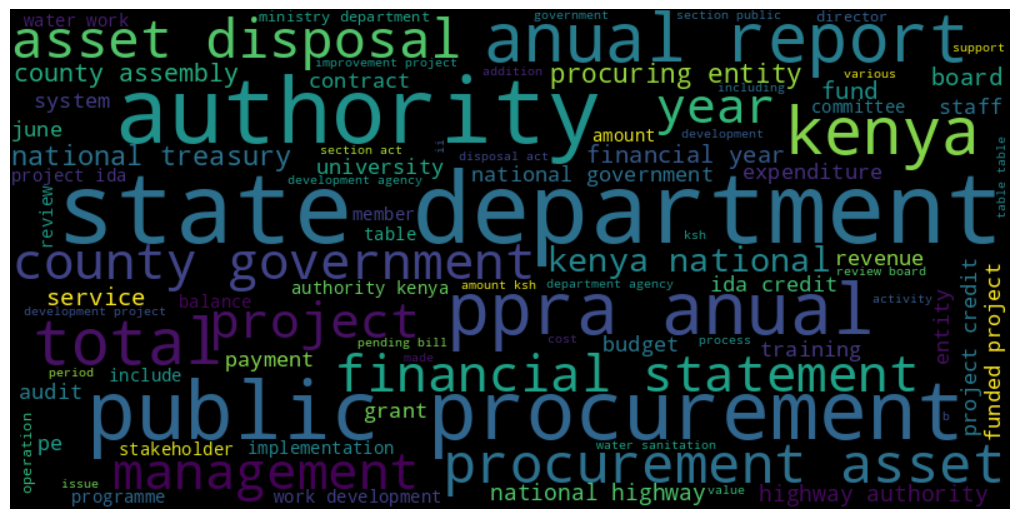

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(input_file, output_file):
    # Read the processed text file
    with open(input_file, 'r', encoding='utf-8') as file:
        text = file.read()

    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400,
                          background_color='black',
                          min_font_size=10).generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

    # Save the image
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Word cloud saved to {output_file}")

    # Show the plot (optional)
    plt.show()

# Usage
input_file = 'processed_fraud_data.txt'  # Your processed text file
output_file = 'fraud_wordcloud.png'  # The output image file

generate_wordcloud(input_file, output_file)

## 4. Modelling

Anomaly Detection:
Unsupervised Learning: Models like Isolation Forest, Autoencoders, or One-Class SVM can identify outliers based on unusual bidding patterns or bidder behavior.
Supervised Learning: If you have labeled data on fraudulent and non-fraudulent tenders, you can use classifiers like Random Forest, Logistic Regression, or Gradient Boosting to predict fraud.
NLP Techniques: For detecting fraud in textual data (e.g., tender descriptions), you can use Topic Modeling or Sentiment Analysis to identify suspicious language patterns or inconsistencies.

## 5. Conclusion

## 6. Recommendations

## 7. Next Steps

: 

: 